core           INFO 	Loading data for United States Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']


Index(['VER', 'PER', 'HAM', 'NOR', 'SAI', 'STR', 'ALO', 'RUS', 'LEC', 'GAS',
       'TSU', 'HUL', 'SAR', 'ALB', 'BOT', 'ZHO', 'PIA', 'MAG', 'RIC', 'OCO'],
      dtype='object', name='Driver')


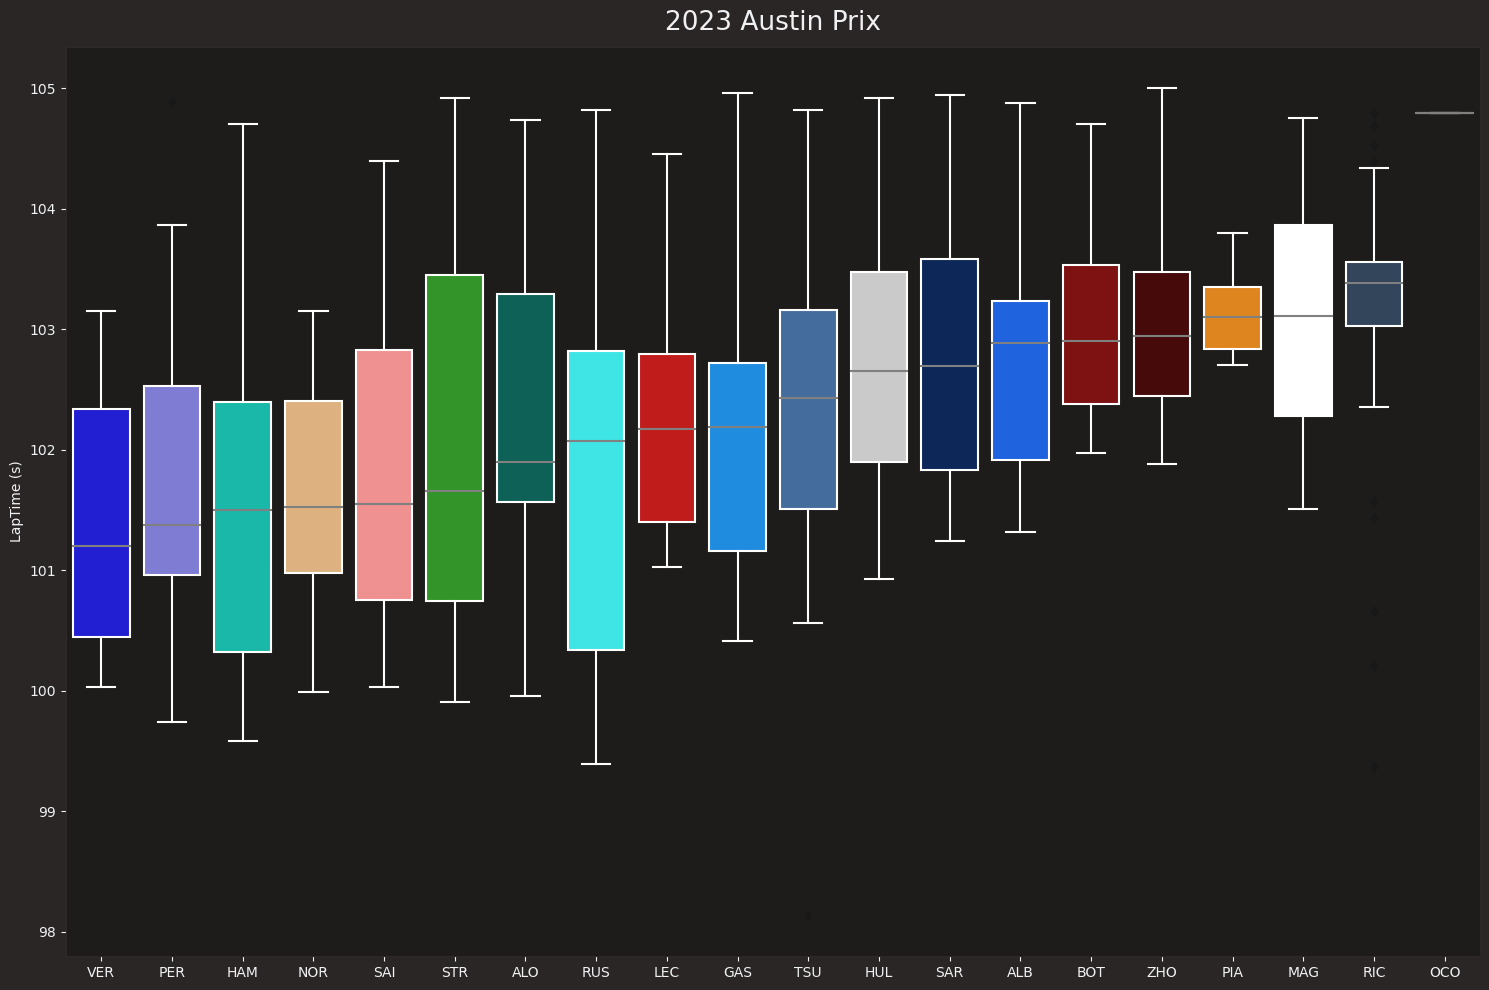

In [4]:
#Rank team's race pace from the fastest to the slowest.

import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

###############################################################################
# Load the race session.
# Pick all quick laps (within 107% of fastest lap).
# For races with mixed conditions, pick_wo_box() is better.
race = fastf1.get_session(2023, "Austin", 'R')
race.load()
laps = race.laps.pick_quicklaps()

###############################################################################
# Convert the lap time column from timedelta to integer.
# This is a seaborn-specific modification.
# If plotting with matplotlib, set mpl_timedelta_support to true
# with plotting.setup_mpl.
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

# make a color palette associating team names to hex codes
# make a color palette associating team names to hex codes
Driver_palette = {}
for driver in driver_order:
    try:
        Driver_palette[driver] = fastf1.plotting.driver_color(driver)
    except KeyError:
        # Assign a default color (e.g., 'grey') to unrecognized drivers
        Driver_palette[driver] = 'grey'

###############################################################################
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    order=driver_order,
    palette=Driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 Austin Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

core           INFO 	Loading data for United States Grand Prix - Race [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 10: Igno

Index(['VER', 'HAM', 'LEC', 'PER', 'RUS', 'VET', 'NOR', 'GAS', 'TSU', 'MSC',
       'ALO', 'OCO', 'MAG', 'ALB', 'STR', 'ZHO', 'RIC', 'BOT', 'LAT'],
      dtype='object', name='Driver')


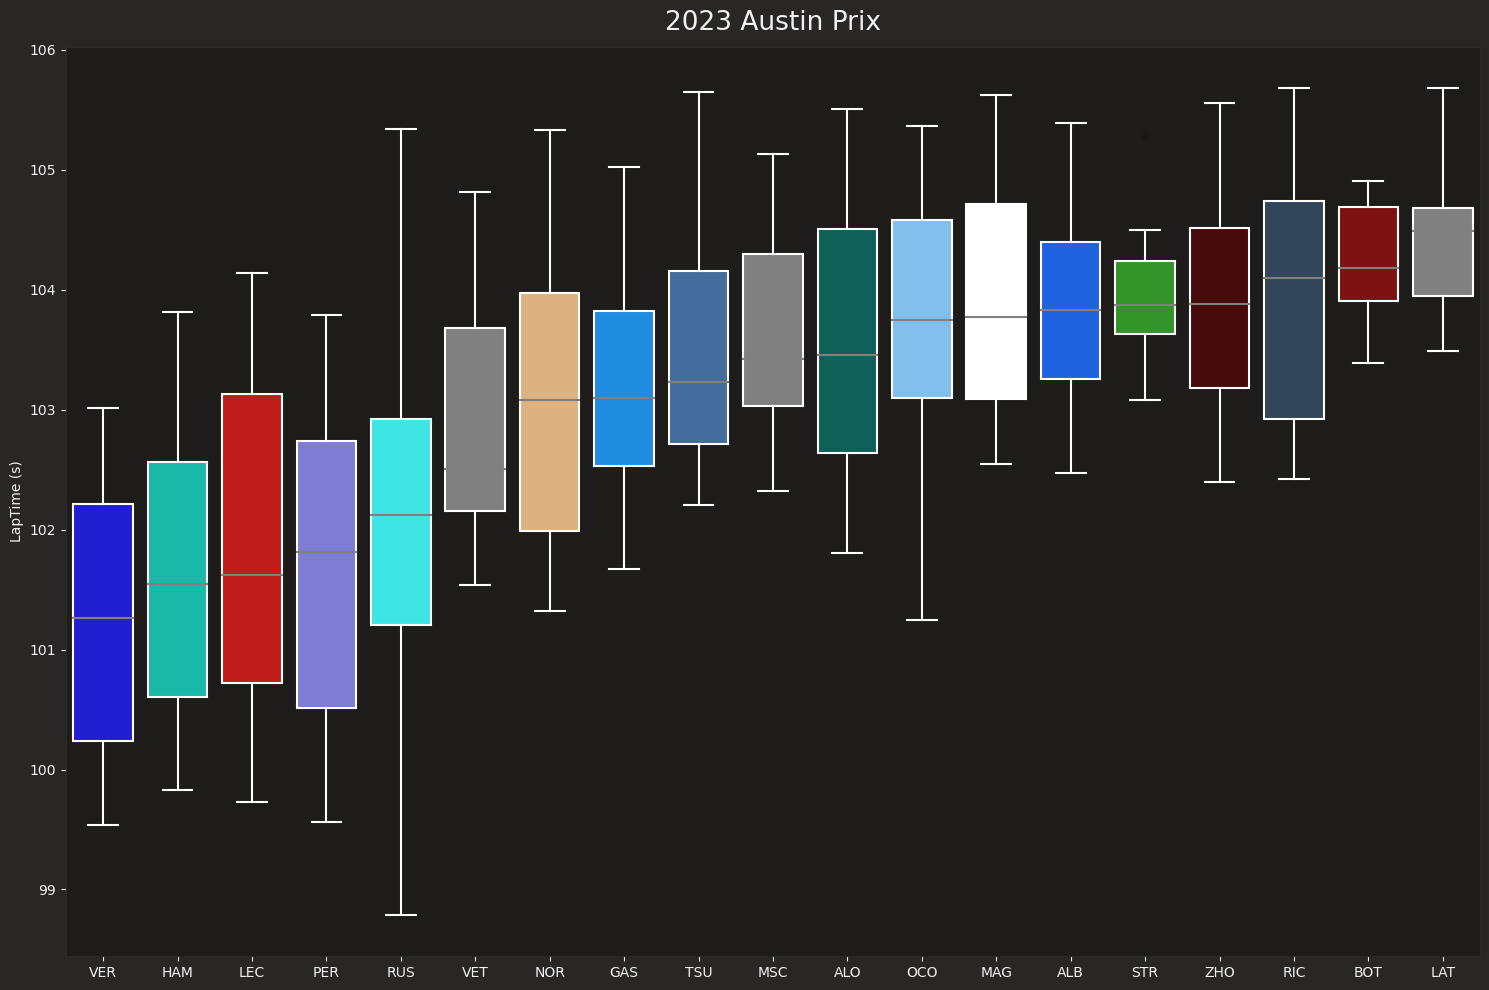

In [5]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

###############################################################################
# Load the race session.
# Pick all quick laps (within 107% of fastest lap).
# For races with mixed conditions, pick_wo_box() is better.
race = fastf1.get_session(2022, "Austin", 'R')
race.load()
laps = race.laps.pick_quicklaps()

###############################################################################
# Convert the lap time column from timedelta to integer.
# This is a seaborn-specific modification.
# If plotting with matplotlib, set mpl_timedelta_support to true
# with plotting.setup_mpl.
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

# make a color palette associating team names to hex codes
# make a color palette associating team names to hex codes
Driver_palette = {}
for driver in driver_order:
    try:
        Driver_palette[driver] = fastf1.plotting.driver_color(driver)
    except KeyError:
        # Assign a default color (e.g., 'grey') to unrecognized drivers
        Driver_palette[driver] = 'grey'

###############################################################################
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    order=driver_order,
    palette=Driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2022 Austin Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()